In [9]:
import math
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['savefig.dpi'] = 400
mpl.rcParams['figure.dpi'] = 400

#Glass Dewar helper functions

def in2mm(power):
    return(25.4 ** power)

def Y(Vp, Vm, Ac):
    r = 1 / 757
    return(r * ((Vp + Vm) / Ac))

def rToA(r):
    return(math.pi * r * r)

#Glass Dewar class object

class glassDewar:
    def __init__(self, Vp, Vm, Rc, hs, corrFactor):
        self.Vp = Vp #in or mm
        self.Vm = Vm #in or mm
        self.Ac = rToA(Rc) #in or mm
        self.hs = hs #mm only
        self.corrFactor = corrFactor #1 if in, 0 if mm
        
        self.Y = Y(self.Vp, self.Vm, self.Ac) * in2mm(corrFactor)
        
    def vdwData(self, pi, pf, nump):
        pdata = np.linspace(pi, pf, num = nump)
        
        Yact = self.Y
        kv = 6.21 * (1e-5)
        
        ldata = kv * np.power(np.subtract(self.hs, Yact * pdata), -1/3)
        return([pdata, ldata])
    
    def plot(self, plotr):
        [pdata, ldata] = self.vdwData(pi = 0, pf = 4, nump = 250)
        ldata *= 1e6
        
        plt.plot(pdata, ldata, label = r"$Y_{sys}$="+str(round(self.Y, 3))+"mm/atm")
        plt.grid()
        plt.legend(loc = 'upper left', fontsize = 16)
        plt.xlabel('Pressure (atm)', fontsize = 16)
        plt.ylabel('VDW Film Thickness (nm)', fontsize = 16)
        if plotr:
            plt.savefig("glassDewar_"+str(round(self.Y, 3))+"mpa.png")
        plt.show()

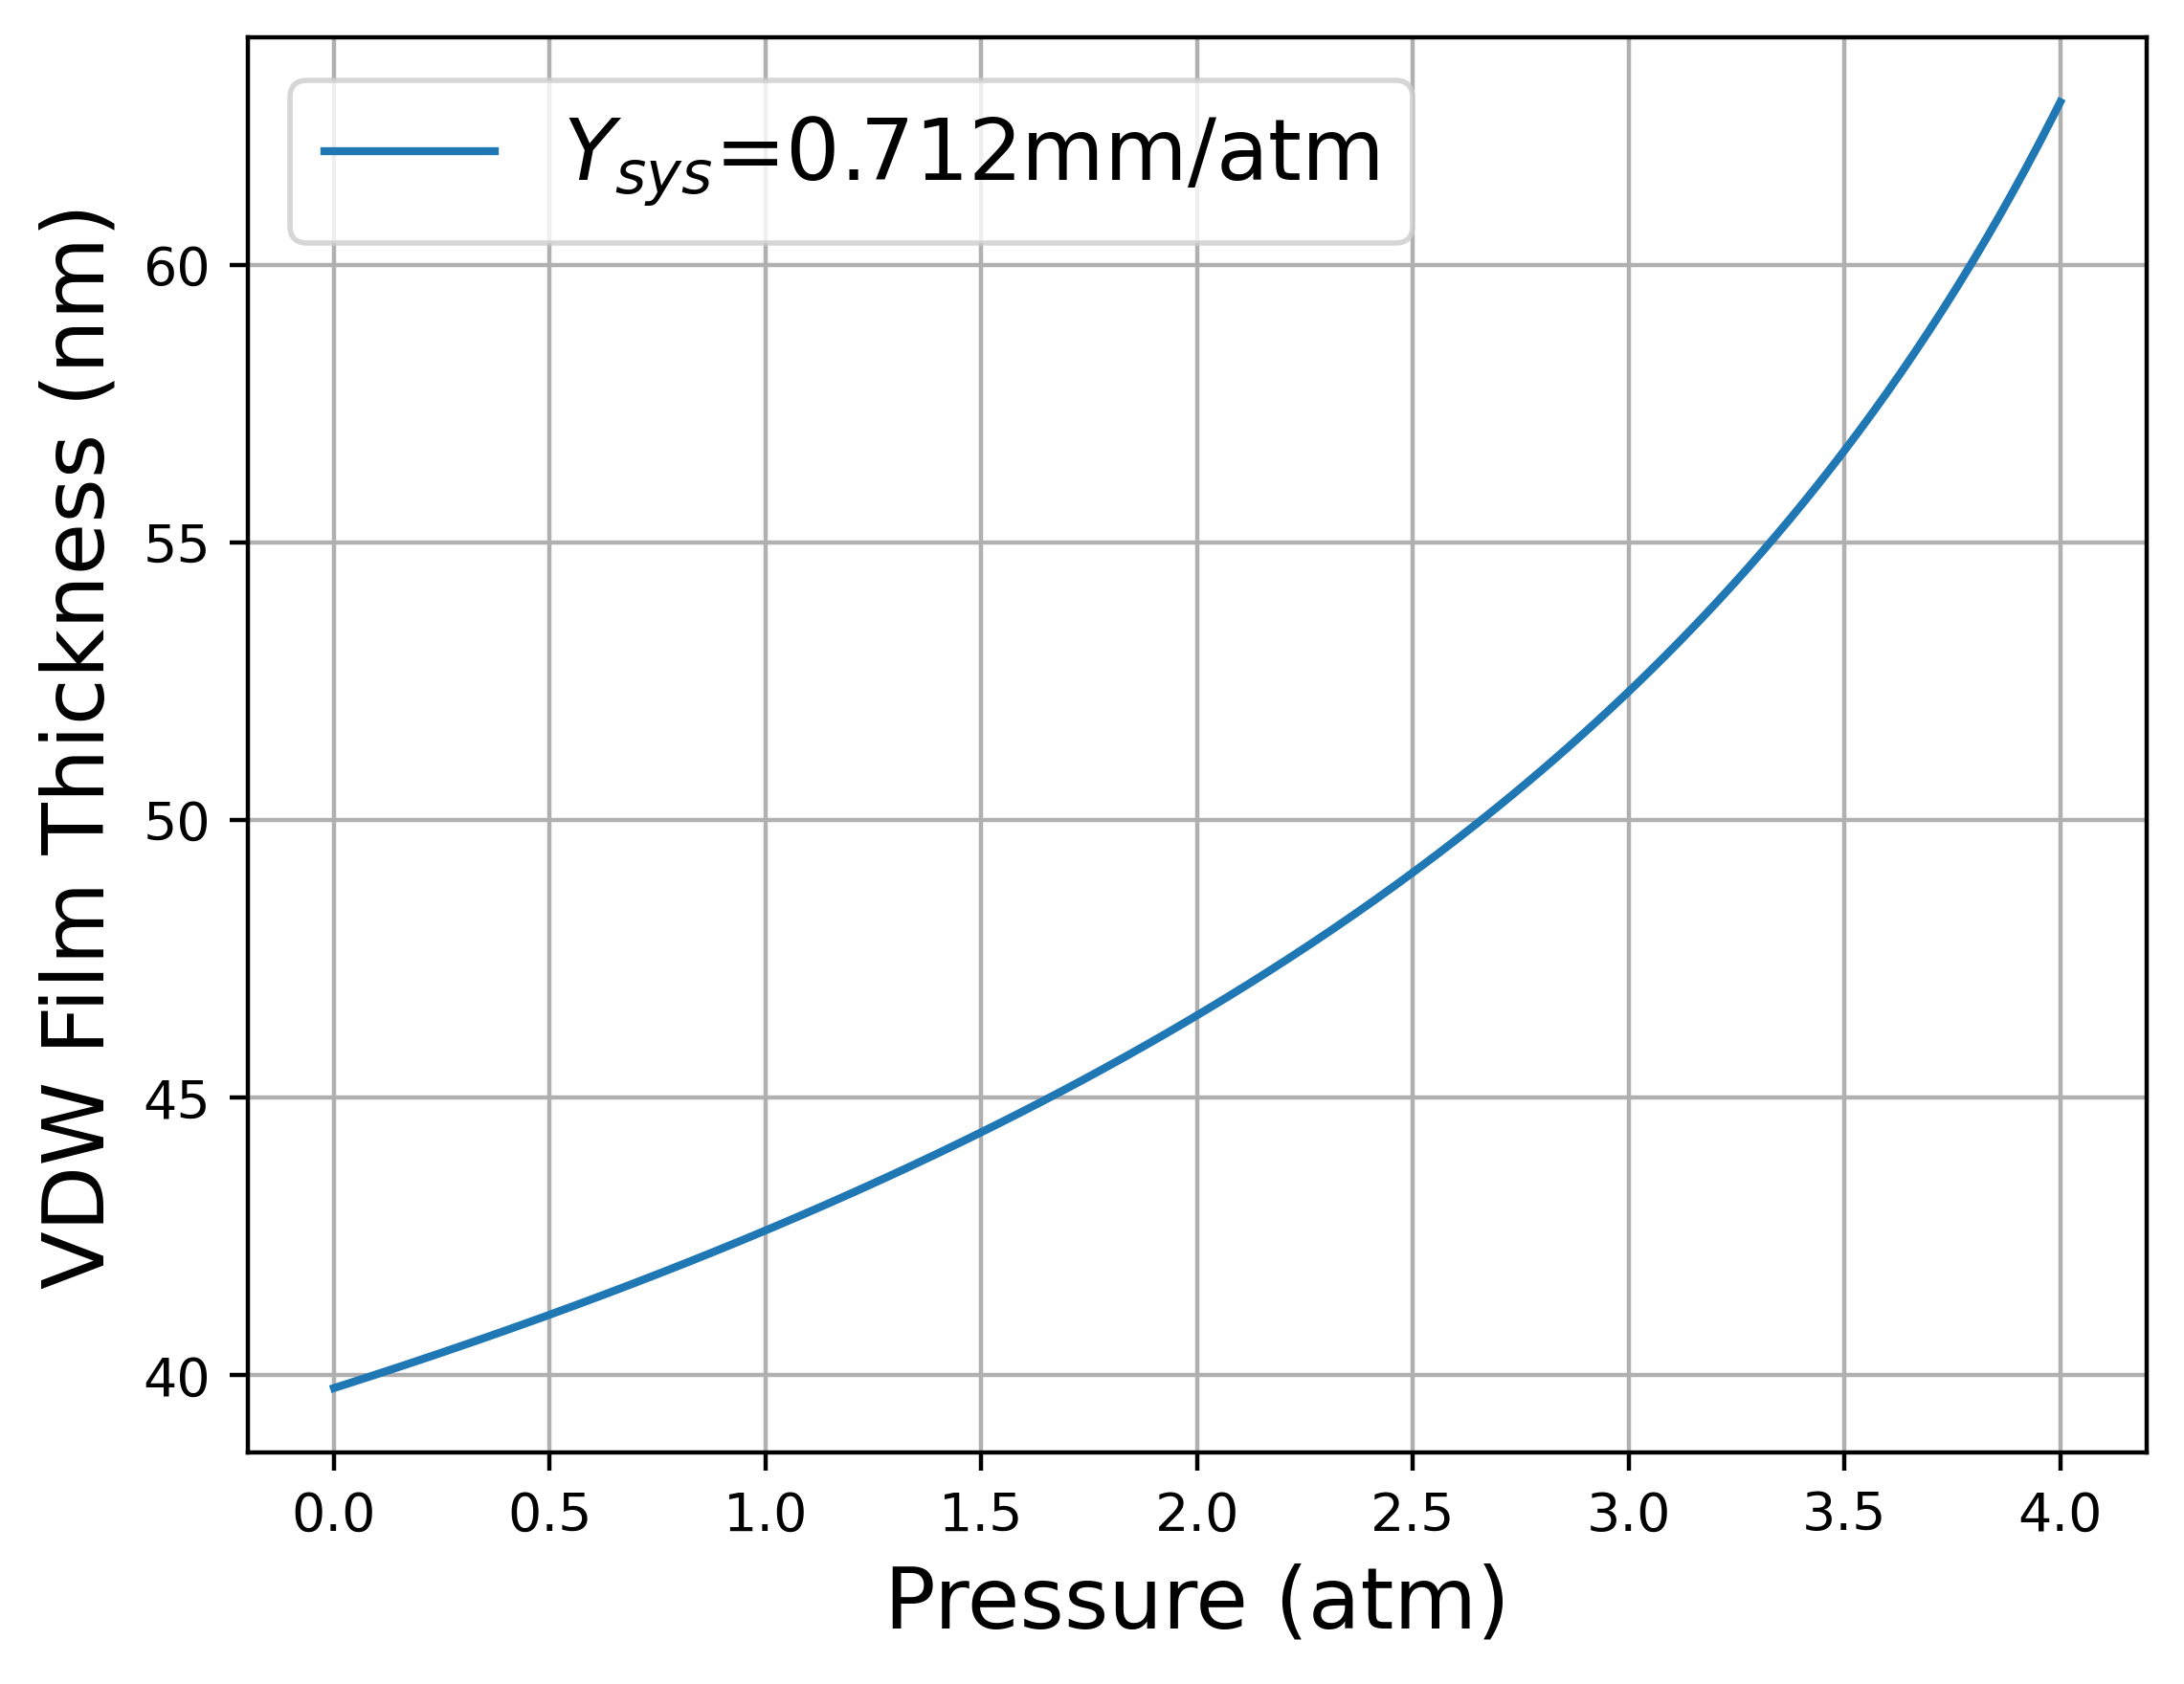

In [10]:
bgd = glassDewar(Vp = 24.24, Vm = 18.44, Rc = 0.8, hs = 3.81, corrFactor = 1)
bgd.plot(1)

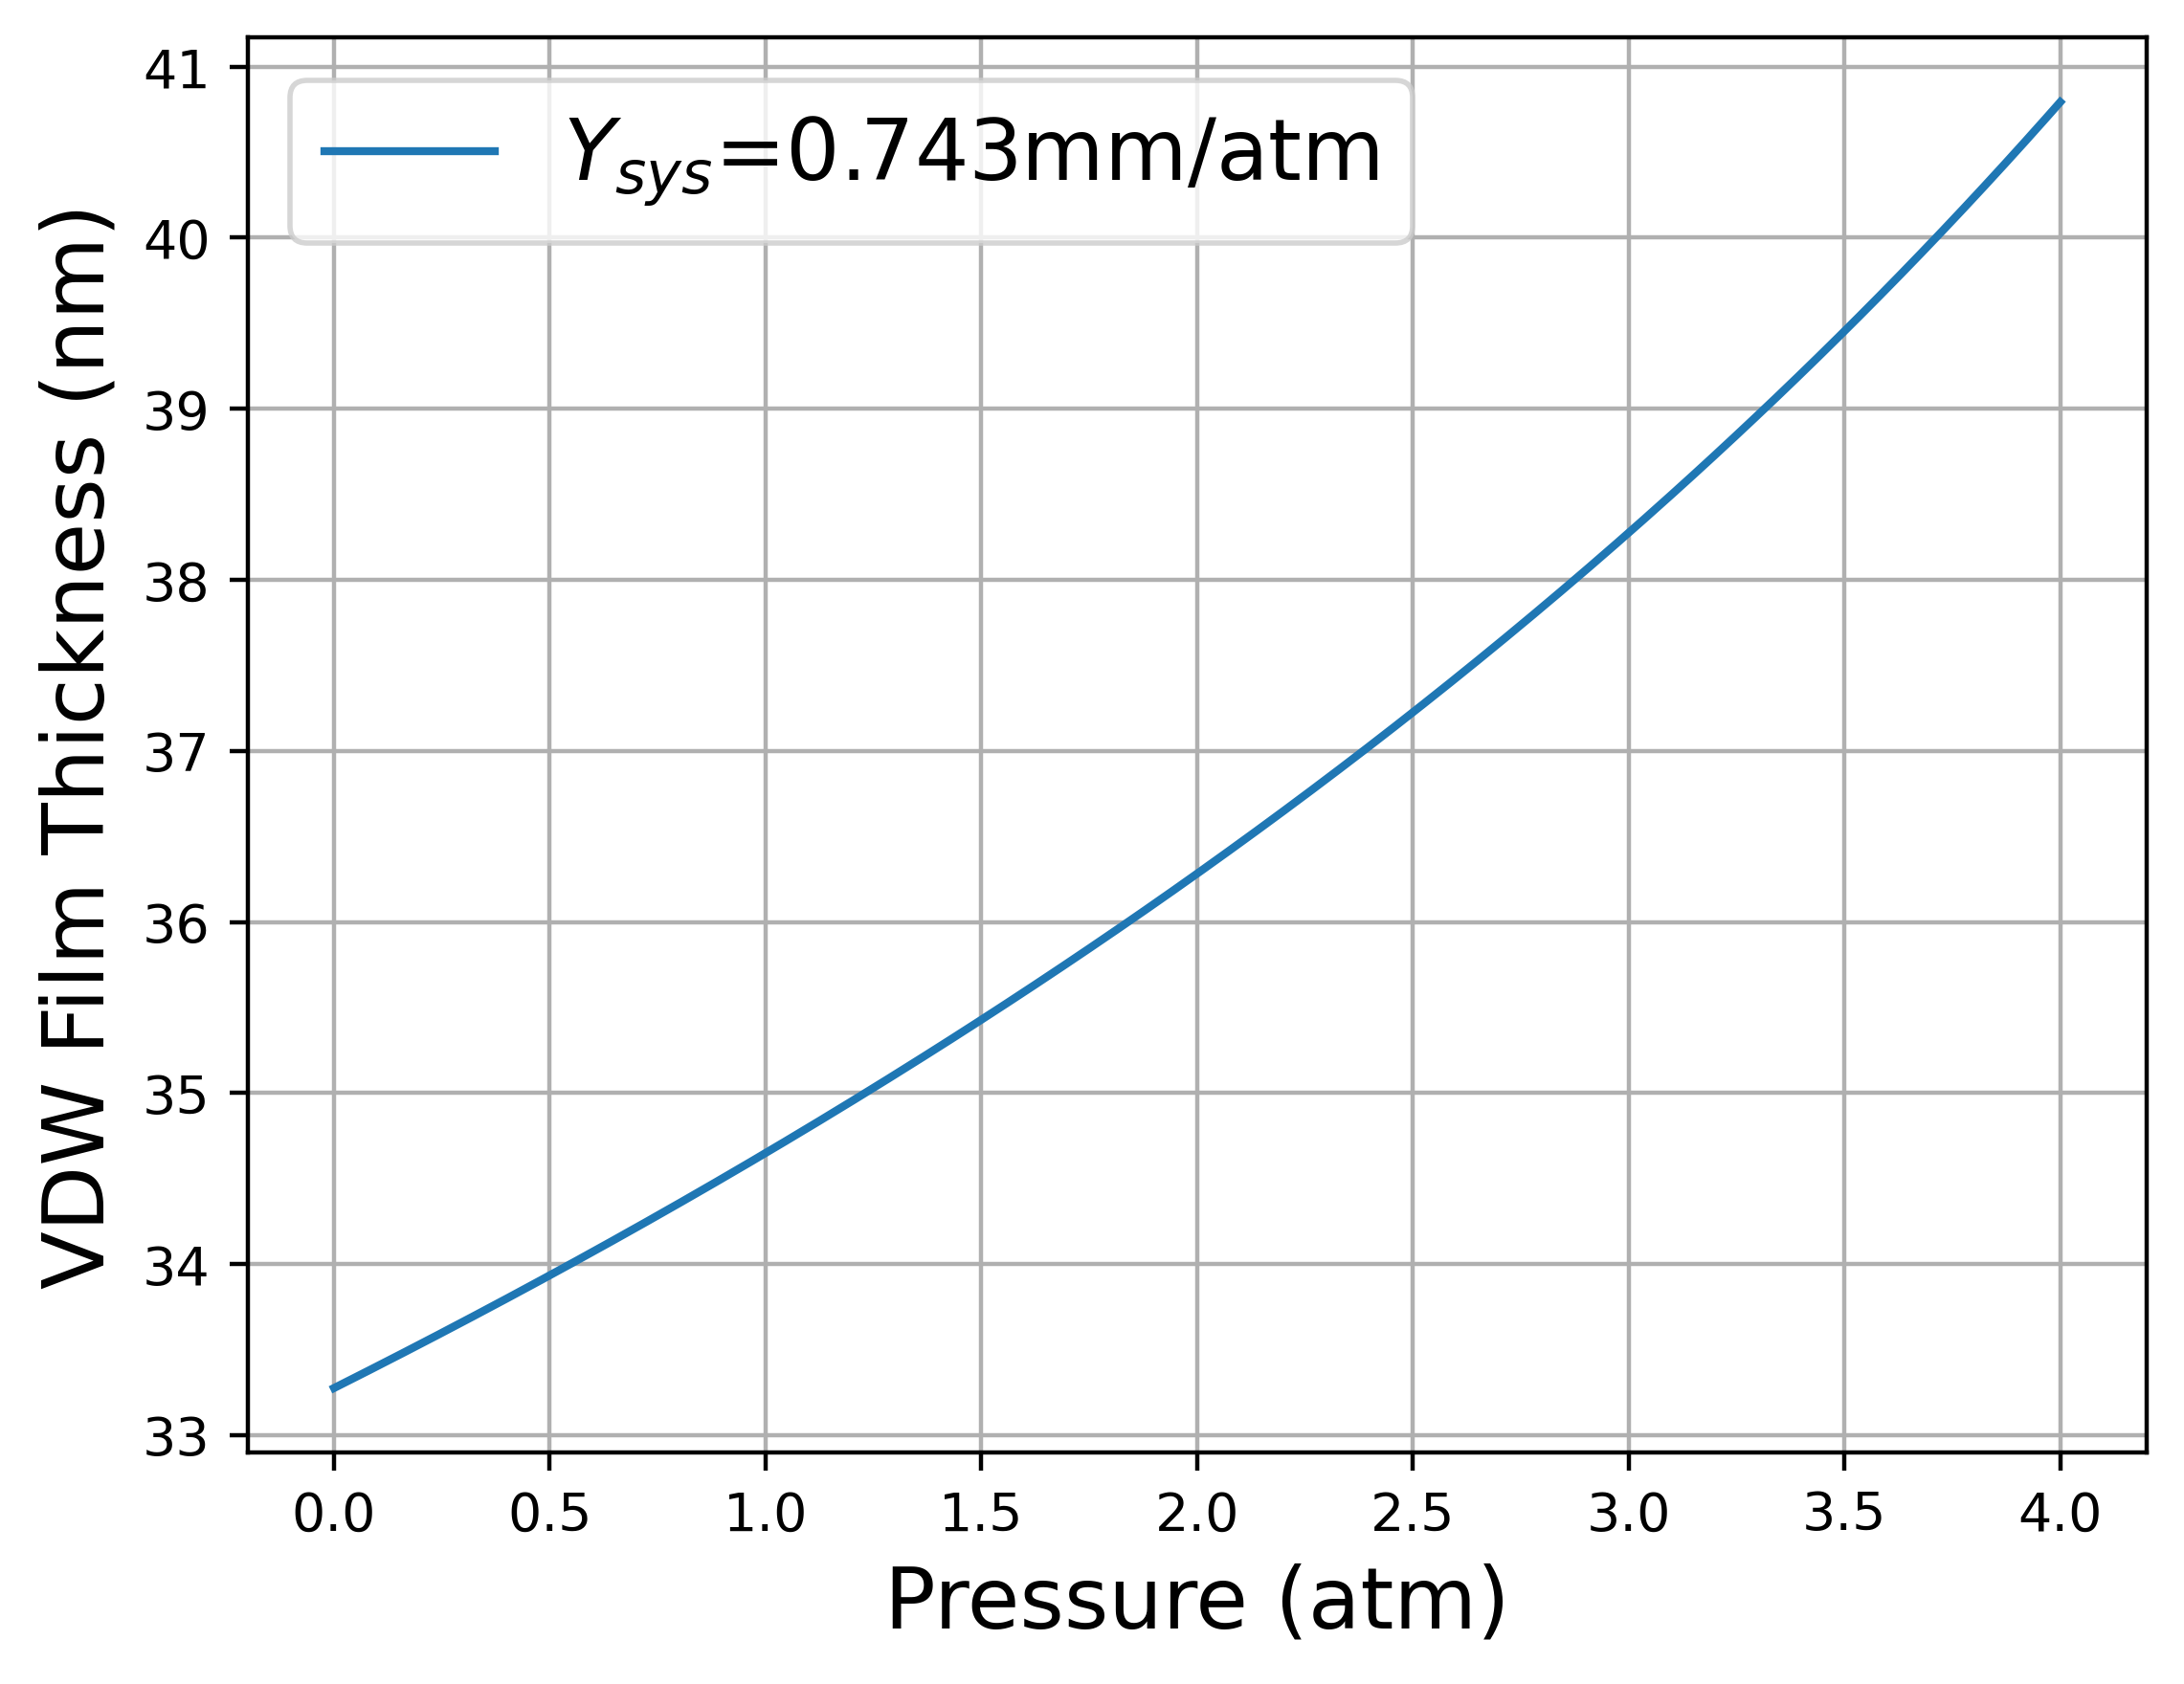

In [11]:
bgd = glassDewar(Vp = 20.69, Vm = 18.44, Rc = 0.75, hs = 6.5, corrFactor = 1)
bgd.plot(1)